<a href="https://colab.research.google.com/github/luthandonx/Python/blob/main/South_Africa_Index_Analysis_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q seaborn


In [ ]:
# Lets Go SA40 
import re
import seaborn as sns

f = open("/content/drive/MyDrive/SA40 /Dataset.txt","r")
#f = open("/content/drive/MyDrive/SA40 /Test Data.txt")

count = 0
date = []
year = []
price_Array = []
open_Array = []
high_Array = []
s = []
p = []
low_Array = []
volume_Array = []
change_Array = []
for x in f:
  p.append(x.split("\t"))

for s in reversed(p):
  date.append(s[0])
  price_Array.append(float(s[1].replace(",",".")))
  open_Array.append(float(s[2].replace(",",".")))
  high_Array.append(float(s[3].replace(",",".")))
  low_Array.append(float(s[4].replace(",",".")))
  volume_Array.append(float(s[5].replace("K","000")))
  change_Array.append(float(s[6].replace("%","")))

arr = []
month = []
day = []
year = []
for d in date:
  arr = d.split(" ")
  month.append(arr[0])
  day.append(arr[1])
  year.append(int(arr[2]))


print(month[1],' ', day[1],' ', year[1], ' ',change_Array[1],' ',volume_Array[1],' ',low_Array[1],' ',high_Array[1],' ',open_Array[1],' ',price_Array[1],' ')
print(type(month[1]),' ',type(day[1]),' ',type(year[1]), ' ',type(change_Array[1]),' ',type(volume_Array[1]),' ',type(low_Array[1]),' ',type(high_Array[1]),' ',type(open_Array[1]),' ',type(price_Array[1]),' ')

Mar   01,   2012   -0.19   59.53   30.212   30.562   30.365   30.472  
<class 'str'>   <class 'str'>   <class 'int'>   <class 'float'>   <class 'float'>   <class 'float'>   <class 'float'>   <class 'float'>   <class 'float'>  


<function matplotlib.pyplot.show>

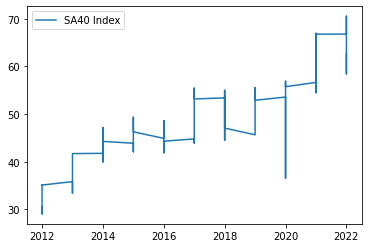

In [ ]:
# No that the array has been sorted out 
#Let us visualize the data

#Imports needed
import numpy as np # linear algebra
import matplotlib.pyplot as plt

graph = plt.plot(year,price_Array,label = "SA40 Index")
plt.legend(loc = 'upper left')
plt.show

In [ ]:

count = 0
pcArry = []
for x in price_Array:
  pcArry.append(float(x))
import pandas as pd

last = len(pcArry)-1

print(len(pcArry))
print(last)

np_Price = np.array(pcArry[3:last])
np_high = np.array(high_Array[3:last])
np_open = np.array(open_Array[3:last])
np_low= np.array(low_Array[3:last])
np_volume =np.array(volume_Array[3:last])
np_change =np.array(change_Array[3:last])
c1 = []
c2 = []
c3 = []
#check the change of the privious 5 days

for x in range(last):
  if (x > 2):
    c1.append(change_Array[x-1])
    c2.append(change_Array[x-2])
    c3.append(change_Array[x-3])

np_c1 = np.array(c1)
np_c2 = np.array(c2)
np_c3 = np.array(c3)


Y_data = []
for y in range(4,len(change_Array)):
  Y_data.append(change_Array[y])

np_NDC = np.array(Y_data)

print('Next Day Change Array: ',len(np_NDC))
print('Change Array: ',len(np_change))
print('CD2 Array: ',len(np_c1))

2627
2626
Next Day Change Array:  2623
Change Array:  2623
CD2 Array:  2623


i can add another column that holds the values of the difference in the change% between the previous day and the next day

In [ ]:
#dataset = pd.DataFrame({ 'NextDayChange':np_NDC,'Price': np_Price,"open": np_open, 'high': np_high , 'low': np_low ,'volume':np_volume , 'change': np_change }, columns=['NextDayChange','Price','open', 'high','low','volume','change'])
dataset = pd.DataFrame({ 'NextDayChange':np_NDC,'Price': np_Price,"open": np_open, 'high': np_high , 'low': np_low ,'volume':np_volume , 'change': np_change, 'CDB1':np_c1 , 'CDB2': np_c2, 'CDB3': np_c3 }, columns=['NextDayChange','Price','open', 'high','low','volume','change','CDB1', 'CDB2','CDB3'])
print(dataset)

      NextDayChange   Price    open    high     low  volume  change  CDB1  \
0             -2.18  30.302  30.310  30.370  30.170   35.15   -0.40 -0.16   
1              0.73  29.642  30.169  30.169  29.485   68.49   -2.18 -0.40   
2              0.44  29.858  29.510  29.938  29.510   60.07    0.73 -2.18   
3              0.37  29.988  29.990  30.090  29.781   61.43    0.44  0.73   
4              0.02  30.098  30.039  30.190  29.962   60.69    0.37  0.44   
...             ...     ...     ...     ...     ...     ...     ...   ...   
2618          -0.72  62.375  62.300  62.574  61.820   13.59    0.56  0.20   
2619          -0.84  61.929  62.275  62.770  61.585   17.00   -0.72  0.56   
2620           1.08  61.410  61.500  61.850  60.896   16.50   -0.84 -0.72   
2621           0.11  62.072  61.520  62.495  61.353   15.13    1.08 -0.84   
2622           0.71  62.140  62.300  62.799  62.025   13.62    0.11  1.08   

      CDB2  CDB3  
0    -0.19  0.02  
1    -0.16 -0.19  
2    -0.40 -0.16  

In [ ]:
#dataset.drop(['CDB2','CDB3','CDB1'], axis=1)


,NextDayChange,Price,open,high,low,volume,change
0,-0.19,30.302,30.310,30.370,30.170,35.15,-0.40
1,-0.16,29.642,30.169,30.169,29.485,68.49,-2.18
2,-0.40,29.858,29.510,29.938,29.510,60.07,0.73
3,-2.18,29.988,29.990,30.090,29.781,61.43,0.44
4,0.73,30.098,30.039,30.190,29.962,60.69,0.37
...,...,...,...,...,...,...,...
2619,0.20,61.929,62.275,62.770,61.585,17.00,-0.72
2620,0.56,61.410,61.500,61.850,60.896,16.50,-0.84
2621,-0.72,62.072,61.520,62.495,61.353,15.13,1.08
2622,-0.84,62.140,62.300,62.799,62.025,13.62,0.11


In [ ]:
print(dataset)

      NextDayChange   Price    open    high     low  volume  change  CDB1  \
0             -2.18  30.302  30.310  30.370  30.170   35.15   -0.40 -0.16   
1              0.73  29.642  30.169  30.169  29.485   68.49   -2.18 -0.40   
2              0.44  29.858  29.510  29.938  29.510   60.07    0.73 -2.18   
3              0.37  29.988  29.990  30.090  29.781   61.43    0.44  0.73   
4              0.02  30.098  30.039  30.190  29.962   60.69    0.37  0.44   
...             ...     ...     ...     ...     ...     ...     ...   ...   
2618          -0.72  62.375  62.300  62.574  61.820   13.59    0.56  0.20   
2619          -0.84  61.929  62.275  62.770  61.585   17.00   -0.72  0.56   
2620           1.08  61.410  61.500  61.850  60.896   16.50   -0.84 -0.72   
2621           0.11  62.072  61.520  62.495  61.353   15.13    1.08 -0.84   
2622           0.71  62.140  62.300  62.799  62.025   13.62    0.11  1.08   

      CDB2  CDB3  
0    -0.19  0.02  
1    -0.16 -0.19  
2    -0.40 -0.16  

In [ ]:
dataset.describe().transpose()
dataset.isna().sum()
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

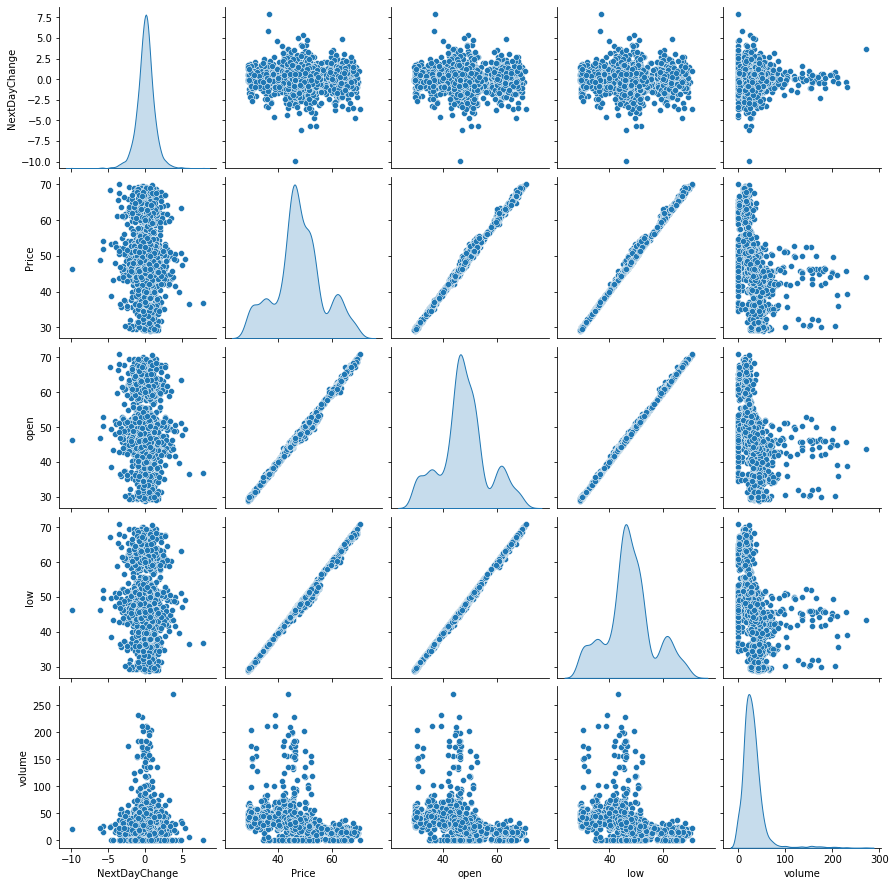

In [ ]:
sns.pairplot(train_dataset[['NextDayChange','Price', 'open', 'low', 'volume']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NextDayChange,2098.0,0.053379,1.204342,-9.900,-0.55000,0.0900,0.6800,7.900
Price,2098.0,47.976954,8.940027,29.033,43.82175,47.0895,52.6460,70.105
open,2098.0,47.837862,8.913020,28.890,43.85025,47.0320,51.9140,71.021
high,2098.0,48.069340,8.891370,29.300,44.13450,47.3110,52.2180,71.817
low,2098.0,47.599064,8.933247,28.861,43.43350,46.7825,51.6915,71.021
volume,2098.0,30.239233,26.331109,0.000,16.30250,25.7150,36.4175,271.420
change,2098.0,0.034466,1.199508,-6.630,-0.57000,0.0700,0.6700,7.900
CDB1,2098.0,0.056687,1.202364,-6.630,-0.53000,0.0800,0.7000,7.900
CDB2,2098.0,0.042660,1.207954,-7.250,-0.56000,0.0800,0.6675,7.900
CDB3,2098.0,0.047736,1.190784,-7.250,-0.55000,0.0900,0.6800,7.900


In [ ]:
import pandas as pd
import numpy as np


df = dataset
# Put your inputs into a single list
df['single_input_vector'] = df['Price'].apply(tuple, axis=1).apply(list)
# Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
# Use .cumsum() to include previous row vectors in the current row list of vectors
df['cumulative_input_vectors'] = df.single_input_vector.cumsum()

TypeError: ignored

In [ ]:
#Reshape Dataset shape so that I can put in a LSTM
X_train = train_dataset.copy()
X_test = test_dataset.copy()

Y_train = X_train.pop('NextDayChange')
Y_test = X_test.pop('NextDayChange')


final_train = X_train
X_train = X_train.values.reshape(2098,1,9)
X_test = X_test.values.reshape(525,1,9)
print("X_train shape",X_train.shape)
print("Y_train shape",Y_train.shape)


Y_train = pd.Series.to_numpy(Y_train)
Y_test = pd.Series.to_numpy(Y_test)
print("X_test shape",X_test.shape)
print("Y_test shape",Y_test.shape)




print(type(X_test))
print(type(Y_test))
print(type(X_train))
print(type(Y_train))

import keras
import tensorflow as tf
from keras import utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN

tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(64,input_shape =(2098,9),  return_sequences=True))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))

model.summary()

ValueError: ignored

In [ ]:

history = model.fit(X_train, Y_train, batch_size= 5 ,epochs = 10, validation_data=(X_test, Y_test))


#Y_train = pd.Series.to_numpy(Y_train)


Epoch 1/10


ValueError: ignored

In [ ]:
X_test = X_test.reshape(525,9)
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [NextDayChange]')
plt.ylabel('Predictions [NextDayChange]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

ValueError: ignored

In [ ]:
X_train = train_dataset.copy()
X_test = test_dataset.copy()

Y_train = X_train.pop('NextDayChange')
Y_test = X_test.pop('NextDayChange')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
NextDayChange,0.053379,1.204342
Price,47.976954,8.940027
open,47.837862,8.913020
high,48.069340,8.891370
low,47.599064,8.933247
volume,30.239233,26.331109
change,0.034466,1.199508
CDB1,0.056687,1.202364
CDB2,0.042660,1.207954
CDB3,0.047736,1.190784


In [ ]:
#Normalize the model
import tensorflow as tf
import keras

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [ ]:
print(normalizer.mean.numpy())

[[4.7976963e+01 4.7837856e+01 4.8069344e+01 4.7599064e+01 3.0239233e+01
  3.4466151e-02 5.6687322e-02 4.2659681e-02 4.7735959e-02]]


In [ ]:
#ML model


from keras import utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN
from sklearn.model_selection import train_test_split

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      keras.layers.LSTM(LSTM(64,return_sequences=True, dropout=0.5, input_shape=(X_train.shape[1], X_train.shape[-1]),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
  return model

SyntaxError: ignored

In [ ]:

from keras import utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN
from sklearn.model_selection import train_test_split

model = Sequential()



model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])


In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

ValueError: ignored

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.0005, patience=8, restore_best_weights=True )
history = dnn_model.fit(X_train, Y_train, batch_size=5 , epochs=100, validation_data=(X_test, Y_test))

In [ ]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, Y_test, verbose=0)

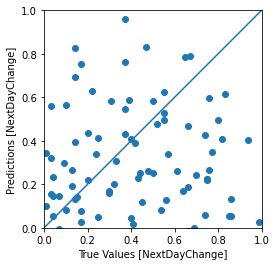

In [ ]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [NextDayChange]')
plt.ylabel('Predictions [NextDayChange]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

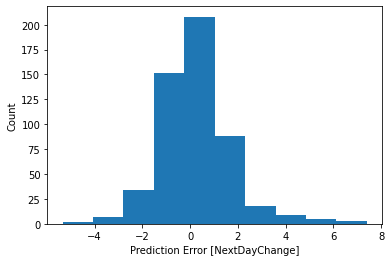

In [ ]:
error = test_predictions - Y_test
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [NextDayChange]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    X_test, Y_test, verbose=0)

In [ ]:
print(test_results['dnn_model'])
pd.DataFrame(test_results['dnn_model'], index=['Mean absolute error [NextDayChange]']).T

[0.008721306920051575, 0.007619047537446022]


ValueError: ignored

In [ ]:
#Lets make some predictions



print(dataset)

test_features = dataset.drop("NextDayChange",axis=1) 


test_predictions = dnn_model.predict(test_features)

print(test_predictions)

    NextDayChange   Price    open    high     low  volume  change  CDB1  CDB2  \
0            0.08  61.239  60.080  61.334  59.905   12.11    0.93  3.01  0.77   
1            0.44  61.285  61.650  62.098  60.625   16.81    0.08  0.93  3.01   
2            0.22  61.553  61.050  61.656  60.617   13.12    0.44  0.08  0.93   
3           -0.63  61.691  61.450  61.999  61.450    9.80    0.22  0.44  0.08   
4            0.93  61.302  61.269  61.742  60.864   10.84   -0.63  0.22  0.44   
5            0.04  61.875  61.425  61.934  61.290   12.23    0.93 -0.63  0.22   
6            0.20  61.902  61.881  62.115  61.594    9.33    0.04  0.93 -0.63   
7            0.56  62.027  62.485  62.889  61.829   16.29    0.20  0.04  0.93   
8           -0.72  62.375  62.300  62.574  61.820   13.59    0.56  0.20  0.04   
9           -0.84  61.929  62.275  62.770  61.585   17.00   -0.72  0.56  0.20   
10           1.08  61.410  61.500  61.850  60.896   16.50   -0.84 -0.72  0.56   
11           0.11  62.072  6